In [1]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit
import random as rd
import time

In [2]:
file_url="supermarket_data.csv"

#Load data from CSV
supermarket_file=pd.read_csv(file_url)

In [3]:
#Show sample of information
supermarket_file.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65


In [4]:
#We count which hour do basket were bought most

hourCount={}

for index,row in supermarket_file.iterrows():
    SHOP_DATE=(row['SHOP_DATE'])
    SHOP_HOUR=(row['SHOP_HOUR'])
    
    BASKET_ID=(row['BASKET_ID'])
    
    if not SHOP_HOUR in hourCount:
        hourCount[SHOP_HOUR]={}

    #We list all baskets in each hour
    hourCount[SHOP_HOUR][BASKET_ID]=1
 


for hour,baskets in hourCount.items():
    #We find total baskets in each hour
    hourCount[hour]=len(baskets)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, '# of baskets by hour')

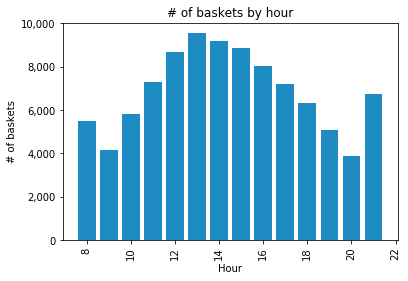

In [5]:
#We plot the cycle of basket bought by hour

plt.bar(hourCount.keys(),hourCount.values(),color='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Hour')
ax.set_ylabel('# of baskets')
plt.title('# of baskets by hour')

In [16]:
dateCount={}

for index,row in supermarket_file.iterrows():
    SHOP_DATE=str(row['SHOP_DATE'])

    BASKET_ID=(row['BASKET_ID'])

    yyyymm=SHOP_DATE[0:6]
    
    if not yyyymm in dateCount:
        dateCount[yyyymm]={}

    dateCount[yyyymm][BASKET_ID]=1
 
for date,baskets in dateCount.items():
    dateCount[date]=len(baskets)

In [26]:
date_pivot=[]

for year in range(2007,2009):
    for month in range(1,13):
        if year==2008 and month>7:
            break
        date_pivot.append(str(year)+str(month).zfill(2))
        
date_pivot

['200701',
 '200702',
 '200703',
 '200704',
 '200705',
 '200706',
 '200707',
 '200708',
 '200709',
 '200710',
 '200711',
 '200712',
 '200801',
 '200802',
 '200803',
 '200804',
 '200805',
 '200806',
 '200807']

Text(0.5, 1.0, '# of baskets by date')

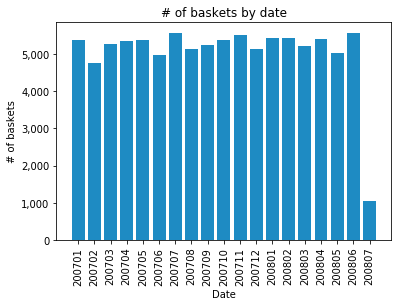

In [28]:
plt.bar(dateCount.keys(),dateCount.values(),color='#1E8BC3')
ax = plt.subplot()
ax.set_xticklabels(date_pivot)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Date')
ax.set_ylabel('# of baskets')
plt.title('# of baskets by date')

In [48]:
purchasePower={}

for index,row in supermarket_file.iterrows():
    SPEND=(row['SPEND'])

    CUST_CODE=(row['CUST_CODE'])

    if not CUST_CODE in purchasePower:
        purchasePower[CUST_CODE]=0

    purchasePower[CUST_CODE]+=SPEND

len(purchasePower)

4891

Text(0.5, 1.0, '# of Total purchase power')

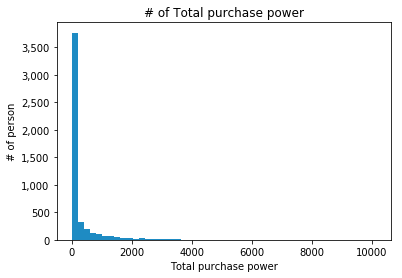

In [55]:
plt.hist(purchasePower.values(), 50, facecolor='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Total purchase power')
ax.set_ylabel('# of person')
plt.title('# of Total purchase power')

In [61]:
purchaseTime={}

for index,row in supermarket_file.iterrows():
    BASKET_ID=(row['BASKET_ID'])
    SPEND=(row['SPEND'])
    CUST_CODE=(row['CUST_CODE'])

    if not CUST_CODE in purchaseTime:
        purchaseTime[CUST_CODE]={}

    if not BASKET_ID in purchaseTime[CUST_CODE]:
        purchaseTime[CUST_CODE][BASKET_ID]=0
        
    purchaseTime[CUST_CODE][BASKET_ID]+=SPEND

for customer_id,baskets in purchaseTime.items():
    purchaseTime[customer_id]=len(baskets)

Text(0.5, 1.0, '# of time of purchasing')

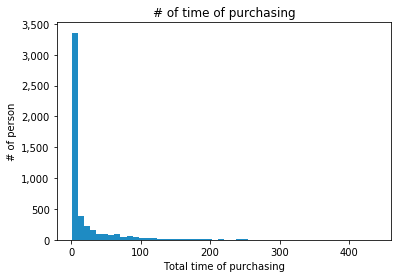

In [65]:
plt.hist(purchaseTime.values(), 50, facecolor='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Total time of purchasing')
ax.set_ylabel('# of person')
plt.title('# of time of purchasing')

In [67]:
averagePurchase={}

for customer_id,spend in purchasePower.items():
    averagePurchase[customer_id]=purchasePower[customer_id]/purchaseTime[customer_id]

Text(0.5, 1.0, 'Average spending by person')

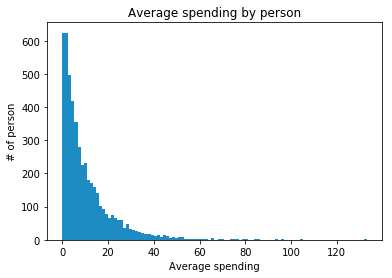

In [69]:
plt.hist(averagePurchase.values(), 100, facecolor='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Average spending')
ax.set_ylabel('# of person')
plt.title('Average spending by person')

In [70]:
x_purchaseTime=[]
y_spending=[]

for customer_id,spend in purchasePower.items():
    x_purchaseTime.append(purchaseTime[customer_id])
    y_spending.append(purchasePower[customer_id])

In [87]:
b, m = polyfit(x_purchaseTime, y_spending, 1)
b,m

(13.612106398658359, 12.235655399611323)

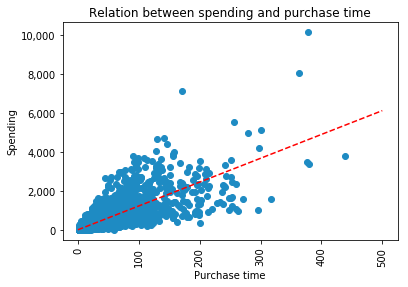

In [86]:
plt.scatter(x_purchaseTime,y_spending,color='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Purchase time')
ax.set_ylabel('Spending')
plt.title('Relation between spending and purchase time')

x = np.linspace(0, 500, 50)
plt.plot(x,  m*x+b, linestyle='dashed',color="red")

In [79]:
#Next, we will show how to implement user-based collaborative filtering recommender system

productBoughtCount={}

for index,row in supermarket_file.iterrows():
    PROD_CODE=(row['PROD_CODE'])
    QUANTITY=int(row['QUANTITY'])
    
    if not PROD_CODE in productBoughtCount:
        productBoughtCount[PROD_CODE]=[0]

    productBoughtCount[PROD_CODE][0]+=QUANTITY

In [80]:
product_dataframe=pd.DataFrame.from_dict(productBoughtCount, orient='index',columns=['frequency'])
product_dataframe.head()

,frequency
PRD0901391,242
PRD0901915,1422
PRD0903379,41
PRD0903305,15
PRD0903387,51


In [81]:
product_dataframe.count()

frequency    4978
dtype: int64

In [82]:
significant_product_dataframe=product_dataframe[product_dataframe['frequency']>=int(product_dataframe.mean())]
significant_product_dataframe.head()

,frequency
PRD0901391,242
PRD0901915,1422
PRD0903764,1618
PRD0903130,5667
PRD0900183,688


In [83]:
significant_product_dataframe.count()

frequency    1092
dtype: int64

In [84]:
significantProductBoughtCount={}

for product_id,freq in productBoughtCount.items():

    if (freq[0]>int(product_dataframe.mean())):
        significantProductBoughtCount[product_id]=[freq]
        
len(significantProductBoughtCount)

1088

In [85]:
productid_to_index={product_id:index for index,product_id in enumerate(significantProductBoughtCount)}
index_to_productid={index:product_id for index,product_id in enumerate(significantProductBoughtCount)}

In [86]:
basket_vectors={}

for index,row in supermarket_file.iterrows():

    BASKET_ID=str(row['BASKET_ID'])
    PROD_CODE=row['PROD_CODE']
    
    QUANTITY=row['QUANTITY']
    
    if PROD_CODE in productid_to_index:
        if not BASKET_ID in basket_vectors:
            basket_vectors[BASKET_ID]={}
            
        product_index=productid_to_index[PROD_CODE]
            
        basket_vectors[BASKET_ID][product_index]=math.log(QUANTITY+1)

In [87]:
basket_vector_size={}

for basket_id,vector in basket_vectors.items():
    vector_size=0
    for product_id,weight in vector.items():
        vector_size+=weight**2
    basket_vector_size[basket_id]=math.sqrt(vector_size)

In [88]:
basket_keys =  list(basket_vectors.keys()) 
rd.shuffle(basket_keys)

basket_vectors_train={}
basket_vectors_test={}

train_test_split_ratio=0.1

for index in range(len(basket_keys)):
    basket_id=basket_keys[index]
    if index<train_test_split_ratio*len(basket_keys):
        basket_vectors_test[basket_id]=basket_vectors[basket_id]
    else:
        basket_vectors_train[basket_id]=basket_vectors[basket_id]

In [118]:
def recommendProductByUserAlgo(product_list):
    
    my_vector={}
    my_vector_size=0
    
    for product,quantity in product_list.items():
        if product in productid_to_index:
            product_index=productid_to_index[product]
            
            my_vector[product_index]=math.log(quantity+1)
            
            my_vector_size+=my_vector[product_index]**2
            
    my_vector_size=math.sqrt(my_vector_size)
            
    vector_score={}
            
    for basket_id,vector in basket_vectors_train.items():
        vector_score[basket_id]=0
        
        intersect_weight=list(set(vector)&set(my_vector))
        
        for weight in intersect_weight:
            vector_score[basket_id]+=(my_vector[weight]*vector[weight])
             
        vector_score[basket_id]/=(my_vector_size*basket_vector_size[basket_id])

    sorted_vector_score=sorted(vector_score.items(), key=lambda item: item[1],reverse=True)

    recommend_vector_id=sorted_vector_score[0][0]
    
    recommend_vector=basket_vectors_train[recommend_vector_id]
    
    recommend_product_id_list=set(basket_vectors_train[recommend_vector_id].keys())-set(my_vector)
    recommend_product_list=[]
    
    for product_id in recommend_product_id_list:
        recommend_product_list.append(index_to_productid[product_id])
            
    return recommend_product_list

In [115]:
recommendProductByUserAlgo({    
"PRD0901915":12,
"PRD0900183":6
})

set()


[]

In [119]:
def convertVectorToBasket(vector):
    new_vector={}
    for product_index,log_freq in vector.items():
        product_id=index_to_productid[product_index]
        freq=math.exp(log_freq)-1
        new_vector[product_id]=freq
    return new_vector

In [123]:
acc_list=[]

count=0

start_time = time.time()
print("Start evaluating")

for basket_id,vector in basket_vectors_test.items():
    
    basket_keys =  list(vector.keys()) 
    rd.shuffle(basket_keys)
    
    pop_index=basket_keys[0]
    product_pop=index_to_productid[pop_index]
    
    preprocess_vector={}
    
    for index in range(1,len(basket_keys)):
        preprocess_vector[basket_keys[index]]=vector[basket_keys[index]]
    

    if (len(preprocess_vector)>0):
        recommend_product_list=recommendProductByUserAlgo(convertVectorToBasket(preprocess_vector))

        if product_pop in recommend_product_list:
            acc_list.append(1)
        else:
            acc_list.append(0)
            
    count+=1
    
elapsed_time = time.time() - start_time

print("Time usage : "+str(round(elapsed_time,2))+" seconds")

Start evaluating
Time usage : 1183.55 seconds


In [124]:
acc=np.mean(acc_list)
print("Accuracy = "+str(acc))

Accuracy = 0.15641103364655956


In [125]:
#Next, we will show how to implement item-based collaborative filtering recommender system

userBuyingCount={}

for index,row in supermarket_file.iterrows():
    CUST_CODE=(row['CUST_CODE'])
    QUANTITY=int(row['QUANTITY'])
    
    if not CUST_CODE in userBuyingCount:
        userBuyingCount[CUST_CODE]=[0]

    userBuyingCount[CUST_CODE][0]+=QUANTITY

In [126]:
user_dataframe=pd.DataFrame.from_dict(userBuyingCount, orient='index',columns=['# of products bought'])
user_dataframe.head()

,# of products bought
CUST0000153531,1
CUST0000219191,2610
CUST0000526979,2548
CUST0000913709,619
CUST0000961285,177


In [127]:
user_dataframe.count()

# of products bought    4891
dtype: int64

In [128]:
significant_user_dataframe=user_dataframe[user_dataframe['# of products bought']>=int(user_dataframe.mean())]
significant_user_dataframe.head()

,# of products bought
CUST0000219191,2610
CUST0000526979,2548
CUST0000913709,619
CUST0000988001,920
CUST0000099658,2745


In [129]:
significant_user_dataframe.count()

# of products bought    992
dtype: int64

In [130]:
significantUserBuyingCount={}

for customer_id,freq in userBuyingCount.items():

    if (freq[0]>int(user_dataframe.mean())):
        significantUserBuyingCount[customer_id]=[freq]
        
len(significantUserBuyingCount)

990

In [131]:
customerid_to_index={customer_id:index for index,customer_id in enumerate(significantUserBuyingCount)}
index_to_customerid={index:customer_id for index,customer_id in enumerate(significantUserBuyingCount)}

In [132]:
product_vectors={}

for index,row in supermarket_file.iterrows():

    CUST_CODE=str(row['CUST_CODE'])
    PROD_CODE=row['PROD_CODE']
    
    QUANTITY=row['QUANTITY']
    
    if CUST_CODE in customerid_to_index:
        if not PROD_CODE in product_vectors:
            product_vectors[PROD_CODE]={}
            
        customer_index=customerid_to_index[CUST_CODE]
            
        product_vectors[PROD_CODE][customer_index]=math.log(QUANTITY+1)

In [133]:
product_vector_size={}

for product_id,vector in product_vectors.items():
    vector_size=0
    for customer_id,weight in vector.items():
        vector_size+=weight**2
    product_vector_size[product_id]=math.sqrt(vector_size)

In [151]:
start_time = time.time()
print("Start evaluating")

product_most_recommend={}

for product_id_pivot in product_vectors.keys():
    
    vector_score={}
    vector_pivot=product_vectors[product_id_pivot]
    
    for product_id in product_vectors.keys():
        
        vector=product_vectors[product_id]
        vector_score[product_id]=0
    
        if product_id!=product_id_pivot:
            
            intersect_weight=list(set(vector_pivot)&set(vector))
            for weight in intersect_weight:
                vector_score[product_id]+=(vector_pivot[weight]*vector[weight])

            vector_score[product_id]/=(product_vector_size[product_id_pivot]*product_vector_size[product_id])
       
    sorted_vector_score=sorted(vector_score.items(), key=lambda item: item[1],reverse=True)

    product_most_recommend[product_id_pivot]=sorted_vector_score[0][0]
    
elapsed_time = time.time() - start_time

print("Time usage : "+str(round(elapsed_time,2))+" seconds")

Start evaluating
Time usage : 150.35 seconds


In [153]:
def recommendProductByItemAlgo(product_list):
    
    recommend_product_list=[]
    
    for product_id in product_list.keys():
        recommend_product_list.append(product_most_recommend[product_id])
            
    return recommend_product_list

In [154]:
recommendProductByItemAlgo({    
"PRD0901915":12,
"PRD0900183":6
})

['PRD0902364', 'PRD0900209']

In [162]:
acc_list=[]

count=0

start_time = time.time()
print("Start evaluating")

for basket_id,vector in basket_vectors_test.items():
    
    basket_keys =  list(vector.keys()) 
    rd.shuffle(basket_keys)
    
    pop_index=basket_keys[0]
    product_pop=index_to_productid[pop_index]
    
    preprocess_vector={}
    
    for index in range(1,len(basket_keys)):
        preprocess_vector[basket_keys[index]]=vector[basket_keys[index]]
    

    if (len(preprocess_vector)>0):
        recommend_product_list=recommendProductByItemAlgo(convertVectorToBasket(preprocess_vector))

        if product_pop in recommend_product_list:
            acc_list.append(1)
        else:
            acc_list.append(0)
            
    count+=1
    
elapsed_time = time.time() - start_time

print("Time usage : "+str(round(elapsed_time,2))+" seconds")

Start evaluating
Time usage : 0.1 seconds


In [163]:
acc=np.mean(acc_list)
print("Accuracy = "+str(acc))

Accuracy = 0.05956350409214914
